# Viola Jones Algorithm

This jupyter notebook has been written to partner with the article *A review of image based facial landmark identification techniques*.

This notebook is licensed under the BSD 3-Clause license.

## Integral Image Algorithm

The [scikit-image](https://github.com/scikit-image/scikit-image) package provides an efficient implementation of the integral image computation.  The following function definition is contained within scikit-image and is covered under the BSD 3-Clause license.  As described within the review article; the entire integral image can be calculated in one pass using the following:

$$
\begin{align}
ii(x, y) &= \sum\limits_{x'\le x,y' \le y}i(x',y') 
\end{align}
$$

where $ii(x,y)$ is the integral image value at pixel location $(x,y)$ and $i(x',y')$ is the original image value.

$$
\begin{align}
s(x,y) &= s(x, y - 1) + i(x,y) \\
ii(x,y) &= ii(x - 1, y) + s(x,y) \\
\end{align}
$$

where $s(x,y)$ is the cumulative sum of pixel values of row $x$, noting that $s(x, -1)=0$ and $ii(-1, y)=0$.

In [1]:
import numpy as np
from scipy.misc import imread
from matplotlib import rcParams
from skimage.transform import integral_image
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = (10, 10)

In [2]:
def integral_image(image):
    """Integral image / summed area table.
    The integral image contains the sum of all elements above and to the
    left of it, i.e.:
    .. math::
       S[m, n] = \sum_{i \leq m} \sum_{j \leq n} X[i, j]
    Parameters
    ----------
    image : ndarray
        Input image.
    Returns
    -------
    S : ndarray
        Integral image/summed area table of same shape as input image.
    References
    ----------
    .. [1] F.C. Crow, "Summed-area tables for texture mapping,"
           ACM SIGGRAPH Computer Graphics, vol. 18, 1984, pp. 207-212.
    """
    S = image
    for i in range(image.ndim):
        S = S.cumsum(axis=i)
    return S

The following simple example, using a 9 pixel image demonstrates the use and calculation of an integral image $ii$.


$I = \begin{bmatrix}
    5 & 2 & 5\\
    3 & 6 & 3\\
    5 & 2 & 5\\
    \end{bmatrix}
 $


In [3]:
I = np.array([[5, 2, 5], [3, 6, 3], [5, 2, 5]])
ii = integral_image(I)
print("The simple integral image (ii)")
print(ii)

The simple integral image (ii)
[[ 5  7 12]
 [ 8 16 24]
 [13 23 36]]


### The integral Image for an actual image

Compute the integral image for the *display_image.jpg*

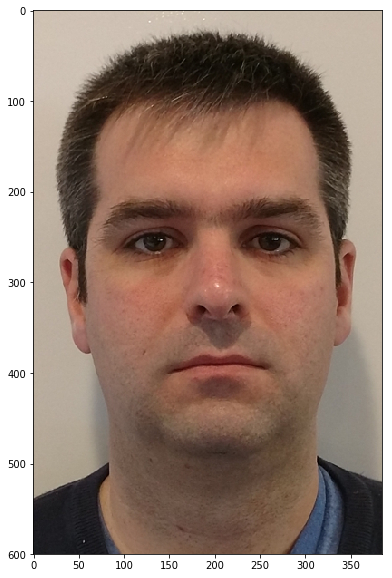

In [4]:
I = imread('../Sec2_Dataset_selection/display_image.jpg')
plt.imshow(I)

In [13]:
ii = integral_image(I)
print("Displaying an extract of the image")
print(I[:3, :3, :])
print("\n Displaying an extract of the integral image")
print(ii[:3, :3, :])

Displaying an extract of the image
[[[208 194 181]
  [208 194 181]
  [206 193 177]]

 [[209 195 182]
  [206 193 177]
  [206 193 177]]

 [[208 195 179]
  [206 193 177]
  [207 194 178]]]

 Displaying an extract of the integral image
[[[ 208  402  583]
  [ 416  804 1166]
  [ 622 1203 1742]]

 [[ 417  806 1169]
  [ 831 1607 2328]
  [1243 2405 3480]]

 [[ 625 1209 1751]
  [1245 2409 3486]
  [1864 3608 5217]]]
